In [59]:
# Imports
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize

In [60]:
# Load the data
headlines_df_1 = pd.read_json("data/headlines_1.json", lines=True)
headlines_df_1.head()

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...


In [61]:
headlines_df_2 = pd.read_csv("data/headlines_2.csv")
headlines_df_2.head()

,text,label
0,Entire Facebook Staff Laughs As Man Tightens P...,1
1,Muslim Woman Denied Soda Can for Fear She Coul...,0
2,Bold Move: Hulu Has Announced That They’re Gon...,1
3,Despondent Jeff Bezos Realizes He’ll Have To W...,1
4,"For men looking for great single women, online...",1


In [62]:
# Check for NaN values
headlines_df_1.isna().sum()

is_sarcastic    0
headline        0
article_link    0
dtype: int64

In [63]:
headlines_df_2.rename(columns={'text': 'headline', 'label': 'is_sarcastic'}, inplace=True)
headlines_df_2.isna().sum()

headline        0
is_sarcastic    0
dtype: int64

In [64]:
# Explore distribution
headlines_df_1['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [65]:
headlines_df_2['is_sarcastic'].value_counts()

0    15000
1     9000
Name: is_sarcastic, dtype: int64

In [66]:
# Merge in the data
headlines_df_2['headline'] = headlines_df_2['headline'].str.lower()
headlines_df_1.drop('article_link', axis=1, inplace=True)
first_column = headlines_df_2.pop('is_sarcastic')
headlines_df_2.insert(0, 'is_sarcastic', first_column)
headlines_df = pd.concat([headlines_df_1, headlines_df_2], ignore_index=True, axis=0)
headlines_df.sample(n = 10)

,is_sarcastic,headline
3862,0,11 odd household objects that will intrigue yo...
39042,1,news: end of a career: regis philbin has annou...
50608,0,north korea's kim jong-un gets 100% of 'yes' v...
26162,1,report: retailers pull in $5 billion annually ...
34910,0,"parkour mishap leaves tall, thin man stuck in ..."
39123,1,affable anti-semite thinks the jews are doing ...
9101,0,family assistants are the new nannies — and he...
39988,0,lifelock offers to protect you from the equifa...
50324,1,evangelical church strips away all the frills ...
38144,0,minor-league team apparently doesn't know what...


In [67]:
headlines_df.shape

(52619, 2)

In [76]:
headlines_df['is_sarcastic'].value_counts()

0    29985
1    22634
Name: is_sarcastic, dtype: int64

<Axes: xlabel='is_sarcastic', ylabel='count'>

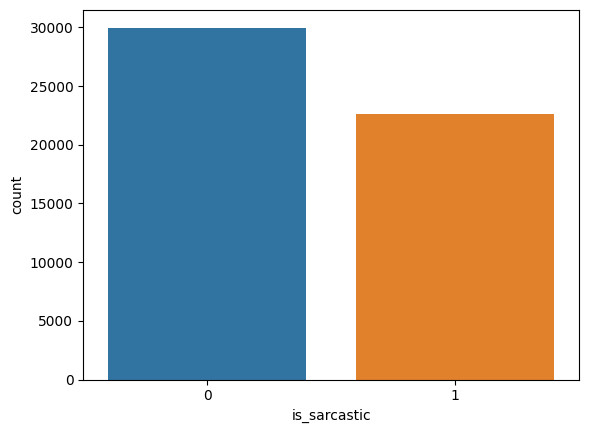

In [68]:
sns.countplot(x='is_sarcastic', data=headlines_df)

In [69]:
# Most common words in non-sarcastic headlines
stop = set(stopwords.words('english'))
common_words_ns = ' '.join(headlines_df[headlines_df.is_sarcastic == 0].headline).split()
common_words_ns = [word for word in common_words_ns if word not in stop]
common_words_ns = pd.Series(common_words_ns)
print(common_words_ns.value_counts()[:10])

man       1756
says      1185
new       1157
trump     1084
police     858
woman      809
people     562
donald     518
school     488
sex        437
dtype: int64


In [70]:
# Most common words in sarcastic headlines
common_words_s = ' '.join(headlines_df[headlines_df.is_sarcastic == 1].headline).split()
common_words_s = [word for word in common_words_s if word not in stop]
common_words_s = pd.Series(common_words_s)
print(common_words_s.value_counts()[:10])

man        1727
new        1548
trump       748
report:     620
area        575
woman       569
one         514
get         461
time        457
like        444
dtype: int64


In [77]:
common_words_ns_df = common_words_ns.value_counts().to_frame(name="frequency_ns")
common_words_s_df = common_words_s.value_counts().to_frame(name="frequency_s")
merged_freq = pd.merge(common_words_ns_df, common_words_s_df, left_index=True, right_index=True, how="outer")
merged_freq['frequency_s'] = merged_freq['frequency_s'].fillna(0)
merged_freq['frequency_ns'] = merged_freq['frequency_ns'].fillna(0)
merged_freq["difference"] = abs(merged_freq["frequency_ns"] - merged_freq["frequency_s"])
merged_freq = merged_freq.sort_values(['difference'], ascending=[False])
merged_freq.head()

,frequency_ns,frequency_s,difference
says,1185.0,244.0,941.0
police,858.0,128.0,730.0
report:,47.0,620.0,573.0
area,28.0,575.0,547.0
life:,5.0,430.0,425.0


In [72]:
def remove_stopwords(headline):
    headline_list = headline.split()
    return ' '.join([word for word in headline_list if word not in stop])

In [73]:
def tokenize(headline):
    tokenized = word_tokenize(headline)
    return ' '.join([word for word in tokenized])

In [74]:
# Create columns with processed version of headlines
cleaned_headlines_df = headlines_df.copy()
cleaned_headlines_df['no_stopwords'] = cleaned_headlines_df.headline.apply(remove_stopwords)
cleaned_headlines_df['tokenized'] = cleaned_headlines_df.headline.apply(tokenize)
cleaned_headlines_df['tokenized_no_stopwords'] = cleaned_headlines_df.no_stopwords.apply(tokenize)
cleaned_headlines_df.head()

,is_sarcastic,headline,no_stopwords,tokenized,tokenized_no_stopwords
0,1,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...,thirtysomething scientists unveil doomsday clo...
1,0,dem rep. totally nails why congress is falling...,dem rep. totally nails congress falling short ...,dem rep. totally nails why congress is falling...,dem rep. totally nails congress falling short ...
2,0,eat your veggies: 9 deliciously different recipes,eat veggies: 9 deliciously different recipes,eat your veggies : 9 deliciously different rec...,eat veggies : 9 deliciously different recipes
3,1,inclement weather prevents liar from getting t...,inclement weather prevents liar getting work,inclement weather prevents liar from getting t...,inclement weather prevents liar getting work
4,1,mother comes pretty close to using word 'strea...,mother comes pretty close using word 'streamin...,mother comes pretty close to using word 'strea...,mother comes pretty close using word 'streamin...


In [75]:
# Save cleaned data
cleaned_headlines_df.to_csv("data/cleaned_headlines.csv")